In [22]:
from astropy.table        import Table
from astropy.coordinates  import SkyCoord

import pandas as pd
import numpy as np
import pylab as pl

In [23]:
params = {'legend.fontsize': '20',
          'figure.figsize': (7, 7),
          'figure.facecolor': 'white',
         'axes.labelsize': '20',
         'axes.titlesize':'20',
         'xtick.labelsize':'20',
         'ytick.labelsize':'20',
         'axes.labelpad' : '20'}
pl.rcParams.update(params)

In [24]:
#Analysis of the filaments in GAMA
df = pd.read_csv('./data/filaments_ddp1_g15.csv')

In [25]:
df.keys()

Index(['Unnamed: 0', 'id_fila', 'x_fila', 'y_fila', 'z_fila'], dtype='object')

In [26]:
def distance(x,y,z,ids):
    N = len(x)
    Nf = len(np.unique(ids))
    distances = []
    ID = []
    for i in range(Nf):
        dis_temp = []
        id_temp = []
        x_temp = np.array(df['x_fila'][df['id_fila'] == i])
        y_temp = np.array(df['y_fila'][df['id_fila'] == i])
        z_temp = np.array(df['z_fila'][df['id_fila'] == i])
        for j in range(len(x_temp)-1):
            d = np.sqrt(  (x_temp[j]-x_temp[j+1])**2 + (y_temp[j]-y_temp[j+1])**2 + (z_temp[j]-z_temp[j+1])**2 )
            dis_temp.append(d)
            id_temp.append(i)
            # if d>20: print(i)
        distances.append(dis_temp)
        ID.append(id_temp)
    return distances, ID

In [27]:
D, ID = distance(df['x_fila'],df['y_fila'],df['z_fila'],df['id_fila'])

In [28]:
D = np.concatenate(D).ravel()
ID = np.concatenate(ID).ravel()

Text(0.5, 0, 'Filament segments lenght [Mpc/h]')

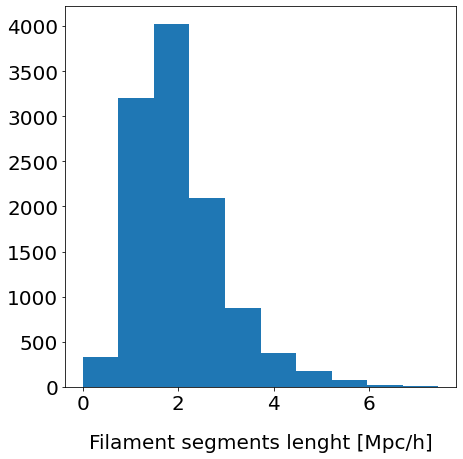

In [29]:
# PLotting the filaments segment lengh
fig = pl.figure(figsize=(7,7))
_ = pl.hist(D)
pl.xlabel('Filament segments lenght [Mpc/h]')

Text(0.5, 0, 'z Mpc/h')

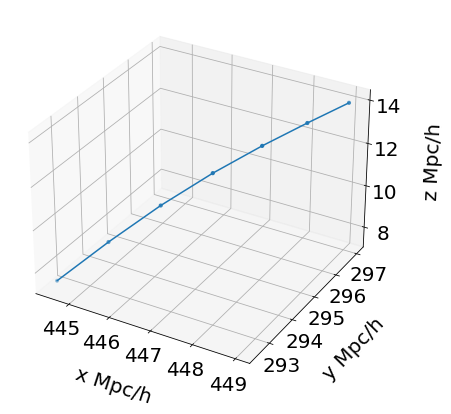

In [30]:
# Plot a filament with filament segments lenght > 20Mpc
fig = pl.figure(figsize=(7,7))
ax = pl.axes(projection='3d')
ii = np.array(df['id_fila']) == 34
ax.plot3D( np.array(df['x_fila'])[ii], np.array(df['y_fila'])[ii], np.array(df['z_fila'])[ii] )
ax.scatter3D( np.array(df['x_fila'])[ii], np.array(df['y_fila'])[ii], np.array(df['z_fila'])[ii] , s= 10)
ax.set_xlabel('x Mpc/h')
ax.set_ylabel('y Mpc/h')
ax.set_zlabel('z Mpc/h')

In [31]:
D[ID == 34]

array([1.91309651, 1.82986229, 1.6650241 , 1.44331028, 1.23210633,
       1.10651541])

In [32]:
np.array(df['x_fila'])[ii], np.array(df['y_fila'])[ii], np.array(df['z_fila'])[ii]

(array([444.5  , 445.322, 446.155, 446.978, 447.739, 448.406, 449.   ]),
 array([292.5  , 293.265, 294.026, 294.78 , 295.526, 296.265, 297.   ]),
 array([ 7.5    ,  9.04888, 10.4895 , 11.725  , 12.6984 , 13.4244 ,
        14.     ]))

In [33]:
for i in range(sum(ii)-1):
    d  = (np.array(df['x_fila'])[ii][i] - np.array(df['x_fila'])[ii][i+1])**2 
    d += (np.array(df['y_fila'])[ii][i] - np.array(df['y_fila'])[ii][i+1])**2
    d += (np.array(df['z_fila'])[ii][i] - np.array(df['z_fila'])[ii][i+1])**2
    d = np.sqrt(d)
    # print(d)

In [34]:
Len_fila = np.zeros(len(np.unique(ID)))
for i in np.unique(ID):
    Len_fila[i] = sum(D[ID==i])

Text(0.5, 0, 'Filaments Lenght [Mpc/h]')

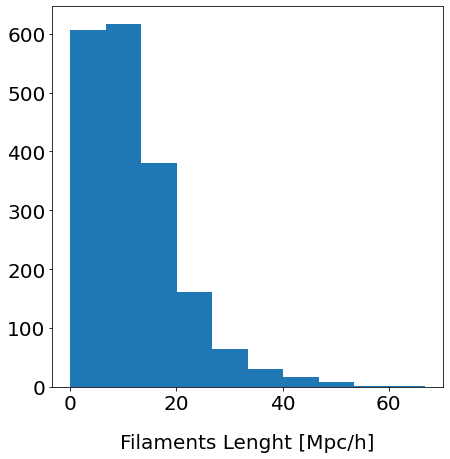

In [35]:
# Hist of the lenght of the filaments
fig = pl.figure(figsize=(7,7))
_ = pl.hist(Len_fila)
pl.xlabel('Filaments Lenght [Mpc/h]')

In [36]:
ids = np.array(np.unique(df['id_fila']), dtype=int)

ra_fila_segment   = []
dec_fila_segment  = []
tilt_fila_segment = []

for ii in ids:
    #- Get individual filaments by id
    x_fila = df['x_fila'][np.array(df['id_fila']) == ii]
    y_fila = df['y_fila'][np.array(df['id_fila']) == ii]
    z_fila = df['z_fila'][np.array(df['id_fila']) == ii]
    
    #- Convert to ra dec coordinates
    c = SkyCoord(x=x_fila, y=y_fila, z=z_fila, unit='Mpc/h', representation_type='cartesian')
    c.representation_type = 'spherical'

    #- Select pairs of points -> Segments
    ra_   = [[c.to_table() [ 'ra'][i].to_value(), c.to_table()[ 'ra'][i+1].to_value()] for i in range(len(x_fila)-1)]
    dec_  = [[c.to_table() ['dec'][i].to_value(), c.to_table()['dec'][i+1].to_value()] for i in range(len(x_fila)-1)]    

    
    for raa, decc in zip(ra_,dec_):
        #- Compute the tilt of each segment
        ra_fila_segment.append(raa)
        dec_fila_segment.append(decc)    

        tilt_temp = np.arctan2(decc[1]-decc[0], raa[1]-raa[0] )*180/np.pi

        if tilt_temp < 0:
            tilt_temp = tilt_temp + 180

        tilt_fila_segment.append(tilt_temp)

Text(0.5, 1.0, 'Orientation of All Filament segments')

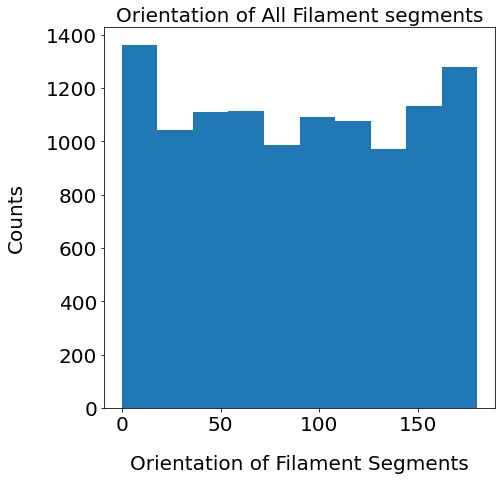

In [37]:
_ = pl.hist(tilt_fila_segment)
pl.xlabel('Orientation of Filament Segments')
pl.ylabel('Counts')
pl.title('Orientation of All Filament segments')